In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


**Import các thư viện cần thiết**

In [2]:
# Thư viện số học và đại số tuyến tính trong Python
import numpy as np

# Thư viện cung cấp cấu trúc dữ liệu và công cụ phân tích dữ liệu
import pandas as pd

# Thư viện đồ họa thống kê dựa trên matplotlib, giúp tạo các biểu đồ một cách dễ dàng và đẹp mắt
import seaborn as sns

# Thư viện vẽ đồ thị và biểu đồ
import matplotlib.pyplot as plt

# Các hàm thống kê cho việc tính toán các hệ số tương quan và kiểm định thống kê
import scipy.stats as stats
from scipy.stats import norm, shapiro, chi2_contingency, kendalltau
from scipy.stats import pearsonr, spearmanr
from scipy.stats import mannwhitneyu, kruskal

# Thư viện tạo đồ thị tương tác và biểu đồ
import plotly.express as px

# Cung cấp mô hình thống kê và kiểm định trong Python
import statsmodels.api as sm

# Chứa các công cụ chuẩn hóa và tiền xử lý dữ liệu trong scikit-learn
from sklearn import preprocessing as pp
from sklearn.preprocessing import MinMaxScaler

# Dùng để vẽ biểu đồ mosaic
from statsmodels.graphics.mosaicplot import mosaic

# Cung cấp công cụ để phát triển và đánh giá mô hình tuyến tính
from statsmodels.formula.api import ols

# Thực hiện kiểm định Tukey HSD cho so sánh đôi chiều
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Thực hiện PCA để giảm chiều dữ liệu khi phân cụm
from sklearn.decomposition import PCA# Thư viện số học và đại số tuyến tính trong Python
import numpy as np

# Thư viện cung cấp cấu trúc dữ liệu và công cụ phân tích dữ liệu
import pandas as pd

# Thư viện đồ họa thống kê dựa trên matplotlib, giúp tạo các biểu đồ một cách dễ dàng và đẹp mắt
import seaborn as sns

# Thư viện vẽ đồ thị và biểu đồ
import matplotlib.pyplot as plt

# Các hàm thống kê cho việc tính toán các hệ số tương quan và kiểm định thống kê
import scipy.stats as stats
from scipy.stats import norm, shapiro, chi2_contingency, kendalltau
from scipy.stats import pearsonr, spearmanr
from scipy.stats import mannwhitneyu, kruskal

# Thư viện tạo đồ thị tương tác và biểu đồ
import plotly.express as px

# Cung cấp mô hình thống kê và kiểm định trong Python
import statsmodels.api as sm

# Chứa các công cụ chuẩn hóa và tiền xử lý dữ liệu trong scikit-learn
from sklearn import preprocessing as pp
from sklearn.preprocessing import MinMaxScaler

# Dùng để vẽ biểu đồ mosaic
from statsmodels.graphics.mosaicplot import mosaic

# Cung cấp công cụ để phát triển và đánh giá mô hình tuyến tính
from statsmodels.formula.api import ols

# Thực hiện kiểm định Tukey HSD cho so sánh đôi chiều
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Thực hiện PCA để giảm chiều dữ liệu khi phân cụm
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/Tài liệu đại cương/Học kỳ 5/Lập trình phân tích dữ liệu/Đồ án LTPTDL/Sleep_health_and_lifestyle_dataset.csv')

# **Chương 2: Tiền xử lý và khám phá dữ liệu (EDA)**


## **I. Tổng quát dữ liệu**

In [4]:
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27.0,Software Engineer,6.1,6.0,42.0,6,Overweight,126/83,77.0,4200.0,None
1,2,Male,28.0,Doctor,6.2,6.0,60.0,8,Normal,125/80,75.0,10000.0,None
2,3,Male,28.0,Doctor,6.2,6.0,60.0,8,Normal,125/80,75.0,10000.0,None
3,4,Male,28.0,Sales Representative,5.9,4.0,30.0,8,Obese,140/90,85.0,3000.0,Sleep Apnea
4,5,Male,28.0,Sales Representative,5.9,4.0,30.0,8,Obese,140/90,85.0,3000.0,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59.0,Nurse,8.1,9.0,75.0,3,Overweight,140/95,68.0,7000.0,Sleep Apnea
370,371,Female,59.0,Nurse,8.0,9.0,75.0,3,Overweight,140/95,68.0,7000.0,Sleep Apnea
371,372,Female,59.0,Nurse,8.1,9.0,75.0,3,Overweight,140/95,68.0,7000.0,Sleep Apnea
372,373,Female,59.0,Nurse,8.1,9.0,75.0,3,Overweight,140/95,68.0,7000.0,Sleep Apnea


In [5]:
## Thông tin chi tiết bộ dữ liệu
print('=== THÔNG TIN BỘ DỮ LIỆU ===')
print('\n>> Số lượng phần tử trong bộ dữ liệu:', data.size)
print('>> Kích thước bộ dữ liệu (số dòng, số cột):', data.shape)
data.info()

=== THÔNG TIN BỘ DỮ LIỆU ===

>> Số lượng phần tử trong bộ dữ liệu: 4862
>> Kích thước bộ dữ liệu (số dòng, số cột): (374, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      373 non-null    float64
 3   Occupation               373 non-null    object 
 4   Sleep Duration           372 non-null    float64
 5   Quality of Sleep         373 non-null    float64
 6   Physical Activity Level  371 non-null    float64
 7   Stress Level             374 non-null    int64  
 8   BMI Category             373 non-null    object 
 9   Blood Pressure           373 non-null    object 
 10  Heart Rate               372 non-null    float64
 11  Daily Steps              373 non-null    float64
 12  Sleep D

## **II. Xử lý dữ liệu bị khuyết**

**1. Kiểm tra dữ liệu bị thiếu**

In [6]:
## Phân tích dữ liệu thiếu
print('Kiểm tra giá trị thiếu trong bộ dữ liệu:')
missing_values = data.isnull().sum()
print(missing_values)

Kiểm tra giá trị thiếu trong bộ dữ liệu:
Person ID                  0
Gender                     0
Age                        1
Occupation                 1
Sleep Duration             2
Quality of Sleep           1
Physical Activity Level    3
Stress Level               0
BMI Category               1
Blood Pressure             1
Heart Rate                 2
Daily Steps                1
Sleep Disorder             1
dtype: int64


**2. Biến numerical**

In [7]:
data.fillna(data.median(numeric_only=True).round(1), inplace=True)

**3. Biến categorical**

In [8]:
string_columns = data.select_dtypes(include=['object']).columns
data[string_columns] = data[string_columns].fillna(data[string_columns].mode().iloc[0])

In [9]:
print('Kiểm tra giá trị thiếu trong bộ dữ liệu:')
missing_values = data.isnull().sum()
print(missing_values)

Kiểm tra giá trị thiếu trong bộ dữ liệu:
Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


## **III. Xử lý chi tiết** (feature, target)

### ***1. Gender***

In [10]:
data['Gender'].describe()

count      374
unique       2
top       Male
freq       189
Name: Gender, dtype: object

In [11]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
gender_count=data['Gender'].value_counts().reset_index()
gender_count

,index,Gender
0,Male,189
1,Female,185


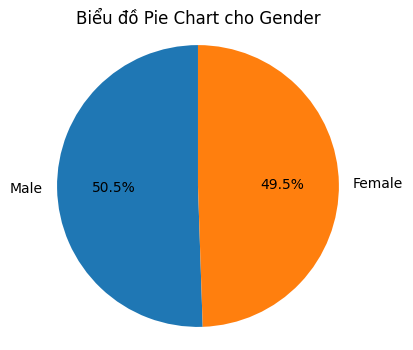

In [13]:
# Tính toán số lượng mẫu cho từng giá trị của thuộc tính "Gender"
gender_counts = data['Gender'].value_counts()

# Tạo biểu đồ Pie Chart
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Biểu đồ Pie Chart cho Gender')
plt.axis('equal')  # Đảm bảo biểu đồ tròn

# Hiển thị biểu đồ
plt.show()

### ***2. Age***

In [14]:
data['Age'].describe()

count    374.000000
mean      42.213904
std        8.657140
min       27.000000
25%       36.000000
50%       43.000000
75%       50.000000
max       59.000000
Name: Age, dtype: float64

In [15]:
data['Age'].unique()

array([27., 28., 29., 30., 31., 32., 43., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 44., 45., 48., 49., 50., 51., 52., 53., 54.,
       55., 56., 57., 58., 59.])

In [16]:
# Chuyển kiểu dữ liệu của cột "Age" từ float thành int
data['Age'] = data['Age'].astype('int')

In [17]:
age_count=data['Age'].value_counts().reset_index()
age_count

,index,Age
0,43,35
1,44,30
2,50,20
3,37,20
4,38,20
5,31,18
6,53,17
7,59,16
8,32,16
9,39,15


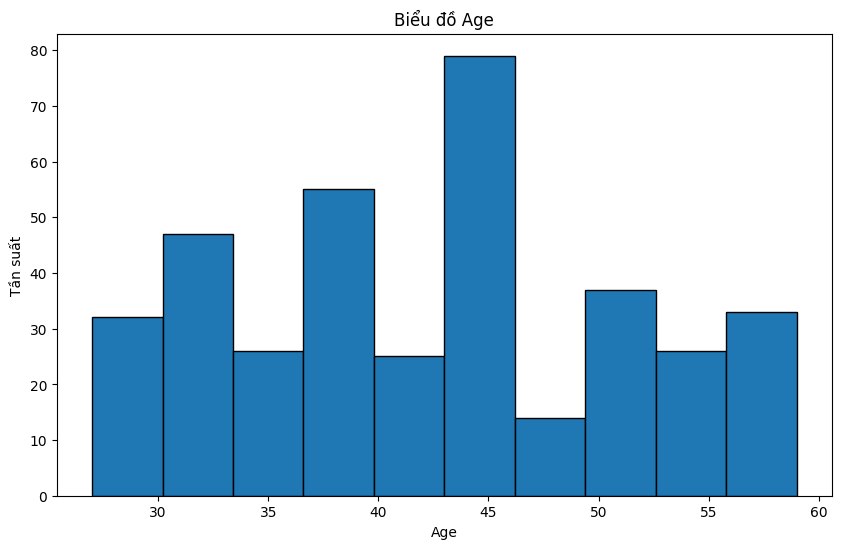

In [18]:
# Tạo biểu đồ Histogram cho thuộc tính "Age"
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=10, edgecolor='black')
plt.title('Biểu đồ Age')
plt.xlabel('Age')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

In [19]:
# Giả sử 'ages' là danh sách hoặc mảng chứa dữ liệu về tuổi
ages = data['Age']

# Xác định các phân vị (percentiles) bạn muốn sử dụng
percentiles = [25, 50, 75]

# Tính toán các phân vị của dữ liệu
age_percentiles = np.percentile(ages, percentiles)

# Hiển thị kết quả
for p, value in zip(percentiles, age_percentiles):
    print(f"{p}th Percentile: {value}")

# 27 - 35 : 8
# 36 - 42 : 6
# 43 - 49 : 6
# 50 - 59 : 9

25th Percentile: 36.0
50th Percentile: 43.0
75th Percentile: 50.0


### ***3. Occupation***

In [20]:
data['Occupation'].describe()

count       374
unique       11
top       Nurse
freq         74
Name: Occupation, dtype: object

In [21]:
data['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [22]:
Occupation_count=data['Occupation'].value_counts().reset_index()
Occupation_count

,index,Occupation
0,Nurse,74
1,Doctor,71
2,Engineer,62
3,Lawyer,47
4,Teacher,40
5,Accountant,37
6,Salesperson,32
7,Software Engineer,4
8,Scientist,4
9,Sales Representative,2


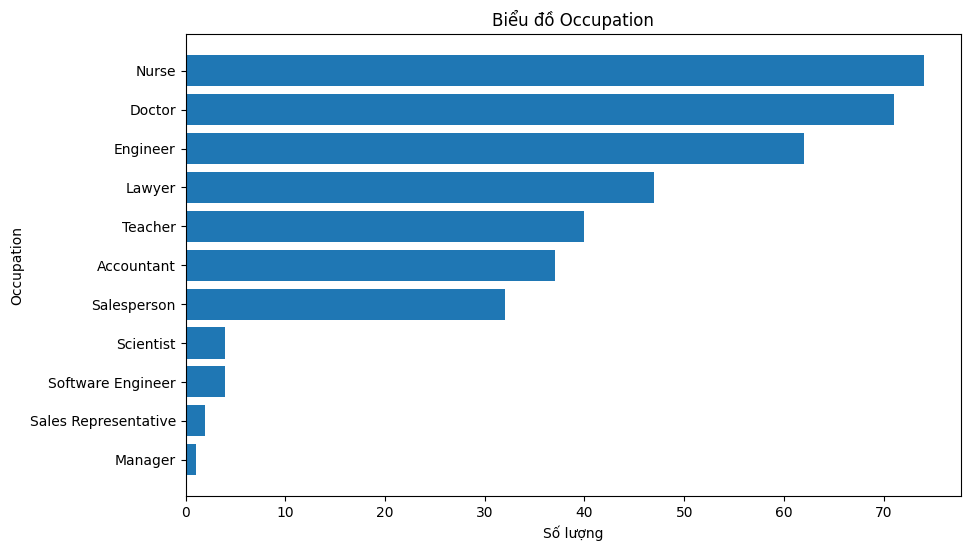

In [23]:
# Tạo biểu đồ Bar Chart cho thuộc tính "Occupation"
occupation_counts = data['Occupation'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(occupation_counts.index, occupation_counts.values)
plt.xlabel('Số lượng')
plt.ylabel('Occupation')
plt.title('Biểu đồ Occupation')

# Hiển thị biểu đồ
plt.show()

### ***4. Sleep Duration***

In [24]:
data['Sleep Duration'].describe()

count    374.000000
mean       7.129947
std        0.794796
min        5.800000
25%        6.400000
50%        7.200000
75%        7.800000
max        8.500000
Name: Sleep Duration, dtype: float64

In [25]:
data['Sleep Duration'].unique()

array([6.1, 6.2, 5.9, 6.3, 7.8, 6. , 6.5, 7.6, 7.7, 7.9, 6.4, 7.2, 7.5,
       5.8, 6.7, 7.3, 7.4, 7.1, 6.6, 6.9, 8. , 6.8, 8.1, 8.3, 8.5, 8.4,
       8.2])

In [26]:
Sleep_Duration_count=data['Sleep Duration'].value_counts().reset_index()
Sleep_Duration_count

,index,Sleep Duration
0,7.2,38
1,6.0,31
2,7.8,27
3,6.5,26
4,6.1,25
5,7.7,24
6,6.6,20
7,7.1,19
8,8.1,15
9,7.3,14


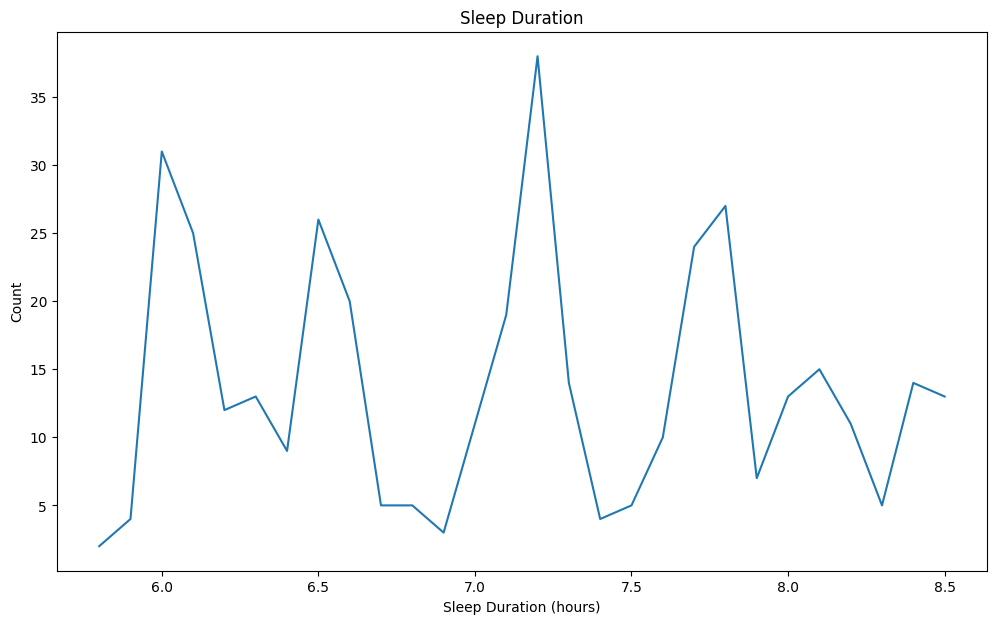

In [27]:
plt.figure(figsize=(12, 7))
sns.lineplot(x = 'index',
             y = 'Sleep Duration',
             data = Sleep_Duration_count)
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Count')
plt.title('Sleep Duration')

plt.show()

### ***5. Quality of Sleep***

In [28]:
data['Quality of Sleep'].describe()

count    374.000000
mean       7.315508
std        1.195131
min        4.000000
25%        6.000000
50%        7.000000
75%        8.000000
max        9.000000
Name: Quality of Sleep, dtype: float64

In [29]:
data['Quality of Sleep'].unique()

array([6., 4., 7., 5., 8., 9.])

In [30]:
# Chuyển dạng dữ liệu của 'Quality of Sleep' từ float64 thành object
data['Quality of Sleep'] = data['Quality of Sleep'].astype('object')

In [31]:
Quality_of_Sleep_count=data['Quality of Sleep'].value_counts().reset_index()
Quality_of_Sleep_count

,index,Quality of Sleep
0,8.0,109
1,6.0,104
2,7.0,78
3,9.0,71
4,5.0,7
5,4.0,5


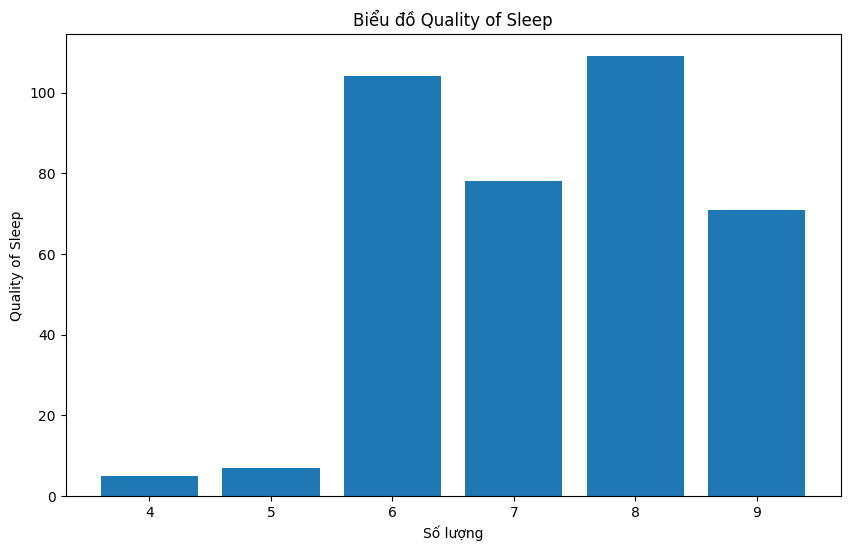

In [32]:
# Tạo biểu đồ Bar Chart cho thuộc tính "Quality of Sleep"
quality_of_Sleep_counts = data['Quality of Sleep'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(quality_of_Sleep_counts.index, quality_of_Sleep_counts.values)
plt.xlabel('Số lượng')
plt.ylabel('Quality of Sleep')
plt.title('Biểu đồ Quality of Sleep')

# Hiển thị biểu đồ
plt.show()

### ***6. Physical Activity Level***

In [33]:
data['Physical Activity Level'].describe()

count    374.000000
mean      59.216578
std       20.918549
min        2.000000
25%       45.000000
50%       60.000000
75%       75.000000
max       90.000000
Name: Physical Activity Level, dtype: float64

In [34]:
data['Physical Activity Level'].unique()

array([42., 60., 30., 40., 75.,  2., 35., 45., 50., 32., 70., 80., 55.,
       90., 47., 65., 85.])

In [35]:
Physical_Activity_Level=data['Physical Activity Level'].value_counts().reset_index()
Physical_Activity_Level

,index,Physical Activity Level
0,60.0,72
1,75.0,67
2,45.0,67
3,90.0,67
4,30.0,66
5,55.0,6
6,40.0,6
7,50.0,4
8,35.0,4
9,70.0,3


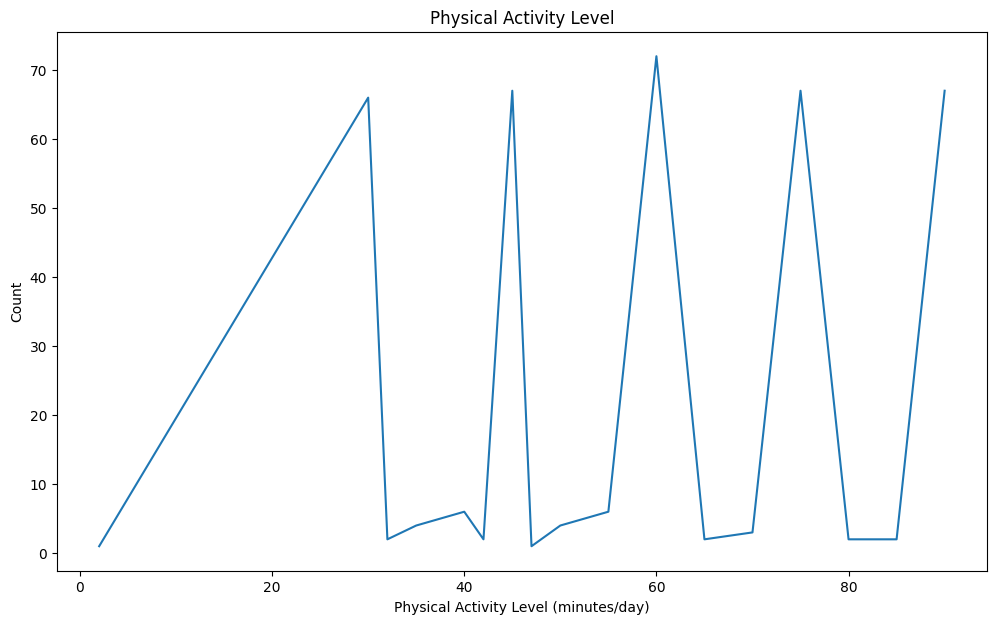

In [36]:
plt.figure(figsize=(12, 7))
sns.lineplot(x = 'index',
             y = 'Physical Activity Level',
             data = Physical_Activity_Level)
plt.xlabel('Physical Activity Level (minutes/day)')
plt.ylabel('Count')
plt.title('Physical Activity Level')

plt.show()

### ***7. Stress Level***

In [37]:
data['Stress Level'].describe()

count    374.000000
mean       5.385027
std        1.774526
min        3.000000
25%        4.000000
50%        5.000000
75%        7.000000
max        8.000000
Name: Stress Level, dtype: float64

In [38]:
data['Stress Level'].unique()

array([6, 8, 7, 4, 3, 5])

In [39]:
# Chuyển dạng dữ liệu của 'Stress Level' từ float64 thành object
data['Stress Level'] = data['Stress Level'].astype('object')

In [40]:
stress_Level_count=data['Stress Level'].value_counts().reset_index()
stress_Level_count

,index,Stress Level
0,3,71
1,8,70
2,4,70
3,5,67
4,7,50
5,6,46


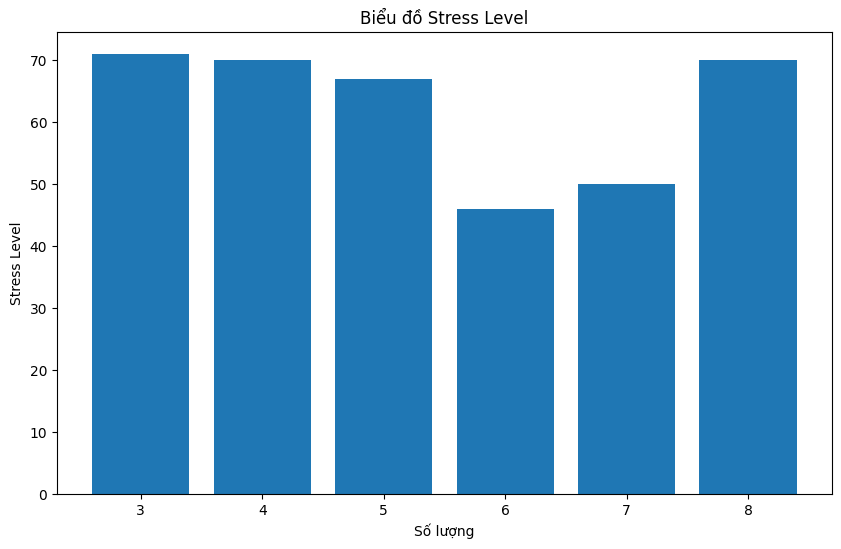

In [41]:
# Tạo biểu đồ Bar Chart cho thuộc tính "Stress Level"
stress_Level_count = data['Stress Level'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(stress_Level_count.index, stress_Level_count.values)
plt.xlabel('Số lượng')
plt.ylabel('Stress Level')
plt.title('Biểu đồ Stress Level')

# Hiển thị biểu đồ
plt.show()

### ***8. BMI Category***

In [42]:
data['BMI Category'].describe()

count        374
unique         4
top       Normal
freq         195
Name: BMI Category, dtype: object

In [43]:
data['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [44]:
# Thay thế các giá trị Normal thành Normal Weight
data['BMI Category']=data['BMI Category'].replace({'Normal':'Normal Weight'})

In [45]:
BMI_Category_count=data['BMI Category'].value_counts().reset_index()
BMI_Category_count

,index,BMI Category
0,Normal Weight,216
1,Overweight,148
2,Obese,10


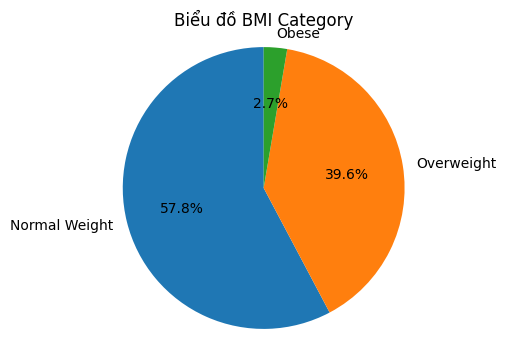

In [46]:
# Tính toán số lượng mẫu cho từng giá trị của thuộc tính "BMI Category"
BMI_category_counts = data['BMI Category'].value_counts()

# Tạo biểu đồ Pie Chart
plt.figure(figsize=(4, 4))
plt.pie(BMI_category_counts, labels=BMI_category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Biểu đồ BMI Category')
plt.axis('equal')  # Đảm bảo biểu đồ tròn

# Hiển thị biểu đồ
plt.show()

### ***9. Blood Pressure***

In [47]:
data['Blood Pressure'].describe()

count        374
unique        25
top       130/85
freq         100
Name: Blood Pressure, dtype: object

In [48]:
data['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '130/85', '135/88', '129/84', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [49]:
# Mã hóa các giá trị của Blood Pressure thành 4 nhóm
data['Blood Pressure'].replace(['120/80','117/76','118/76','115/75','115/78', '119/77', '118/75']
                               , 'HA Bình thường', inplace=True)
data['Blood Pressure'].replace(['125/80','121/79','122/80'], 'HA Cao', inplace=True)
data['Blood Pressure'].replace(['132/87','130/86','126/83','128/85','131/86', '128/84', '130/85',
                                '135/88', '129/84', '125/82'], 'Tăng HA giai đoạn 1', inplace=True)
data['Blood Pressure'].replace(['140/90','135/90','142/92','140/95','139/91'], 'Tăng HA giai đoạn 2', inplace=True)
# 0 = Huyết áp bình thường (<120 và <80)
# 1 = Huyết áp cao (120–129	và <80)
# 2 = Tăng huyết áp giai đoạn 1 (130–139 hoặc 80–89)
# 3 = Tăng huyết áp giai đoạn 2 (>=140 hoặc >=90)

In [50]:
blood_bressure_counts=data['Blood Pressure'].value_counts().reset_index()
blood_bressure_counts

,index,Blood Pressure
0,Tăng HA giai đoạn 1,122
1,Tăng HA giai đoạn 2,100
2,HA Bình thường,86
3,HA Cao,66


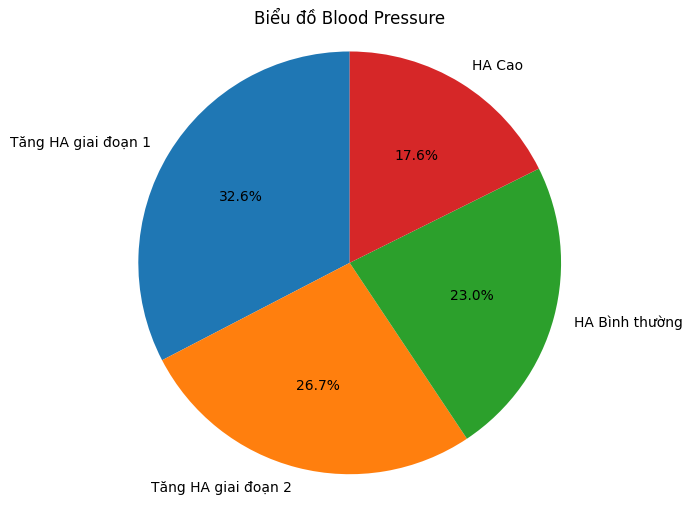

In [51]:
# Tính toán số lượng mẫu cho từng giá trị của thuộc tính "Blood Pressure"
blood_bressure_counts = data['Blood Pressure'].value_counts()

# Tạo biểu đồ Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(blood_bressure_counts, labels=blood_bressure_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Biểu đồ Blood Pressure')
plt.axis('equal')  # Đảm bảo biểu đồ tròn

# Hiển thị biểu đồ
plt.show()

### ***10. Heart Rate***

In [52]:
data['Heart Rate'].describe()

count    374.000000
mean      70.179144
std        4.127004
min       65.000000
25%       68.000000
50%       70.000000
75%       72.000000
max       86.000000
Name: Heart Rate, dtype: float64

In [53]:
data['Heart Rate'].unique()

array([77., 75., 85., 82., 70., 80., 78., 69., 72., 68., 76., 81., 65.,
       84., 74., 67., 73., 83., 86.])

In [54]:
# Chuyển kiểu dữ liệu của cột "Heart Rate" từ float thành int
data['Heart Rate'] = data['Heart Rate'].astype('int')

In [55]:
Heart_Rate_count=data['Heart Rate'].value_counts().reset_index()
Heart_Rate_count

,index,Heart Rate
0,68,94
1,70,77
2,72,69
3,65,66
4,75,36
5,78,5
6,85,3
7,80,3
8,84,2
9,83,2


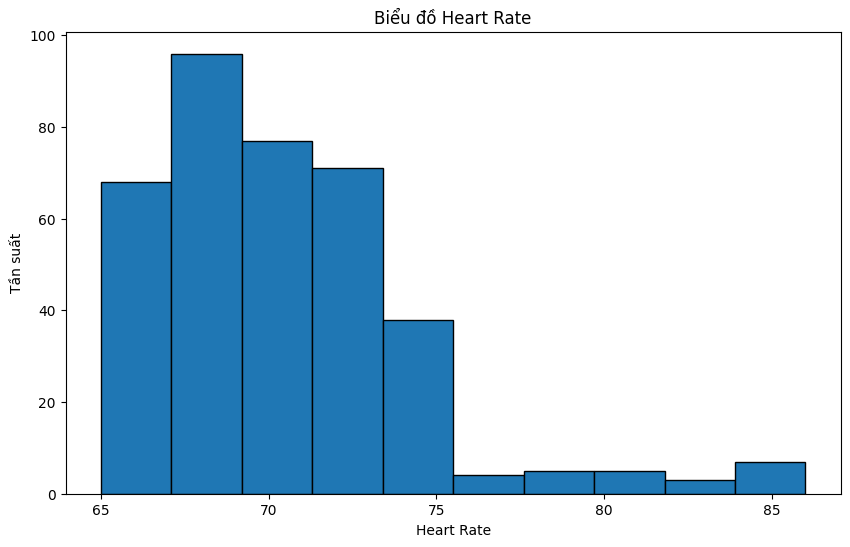

In [56]:
# Tạo biểu đồ Histogram cho thuộc tính "Heart Rate"
plt.figure(figsize=(10, 6))
plt.hist(data['Heart Rate'], bins=10, edgecolor='black')
plt.title('Biểu đồ Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

### ***11. Daily Steps***

In [57]:
data['Daily Steps'].describe()

count      374.000000
mean      6820.053476
std       1779.432388
min        200.000000
25%       5525.000000
50%       7000.000000
75%       8000.000000
max      20000.000000
Name: Daily Steps, dtype: float64

In [58]:
data['Daily Steps'].unique()

array([ 4200., 10000.,  3000.,  3500.,  8000.,   200.,  4000.,  4100.,
        6800.,  5000.,  7000.,  5500.,  5200.,  5600.,  3300.,  4800.,
        7500.,  7300.,  6200.,  6000., 20000.,  3700.])

In [59]:
# Chuyển kiểu dữ liệu của cột "Daily Steps" từ float thành int
data['Daily Steps'] = data['Daily Steps'].astype('int')

In [60]:
Daily_Steps_count=data['Daily Steps'].value_counts().reset_index()
Daily_Steps_count

,index,Daily Steps
0,8000,99
1,6000,68
2,5000,68
3,7000,67
4,10000,35
5,5500,4
6,3000,3
7,3500,3
8,4000,3
9,6800,3


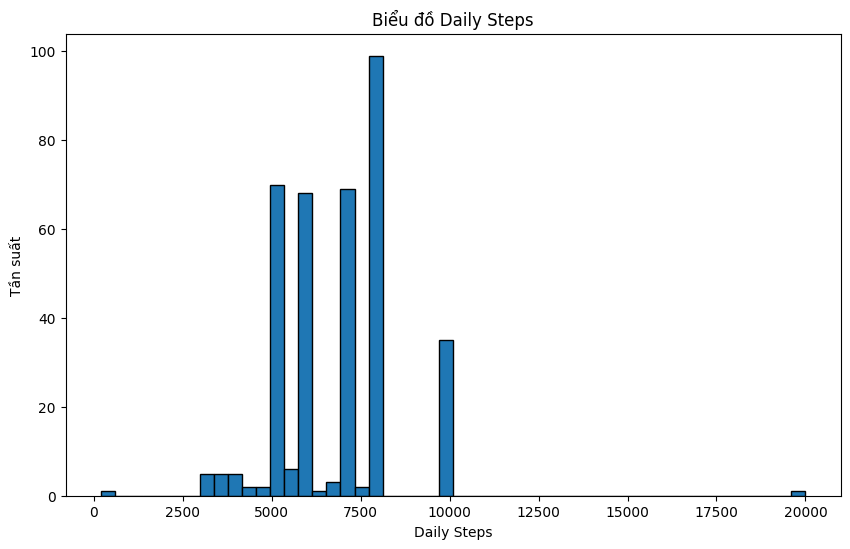

In [61]:
# Tạo biểu đồ Histogram cho thuộc tính "Daily Steps"
plt.figure(figsize=(10, 6))
plt.hist(data['Daily Steps'], bins=50, edgecolor='black')
plt.title('Biểu đồ Daily Steps')
plt.xlabel('Daily Steps')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

### ***12. Sleep Disorder***

In [62]:
data['Sleep Disorder'].describe()

count      374
unique       3
top       None
freq       220
Name: Sleep Disorder, dtype: object

In [63]:
data['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [64]:
Sleep_Disorder_count=data['Sleep Disorder'].value_counts().reset_index()
Sleep_Disorder_count

,index,Sleep Disorder
0,None,220
1,Sleep Apnea,78
2,Insomnia,76


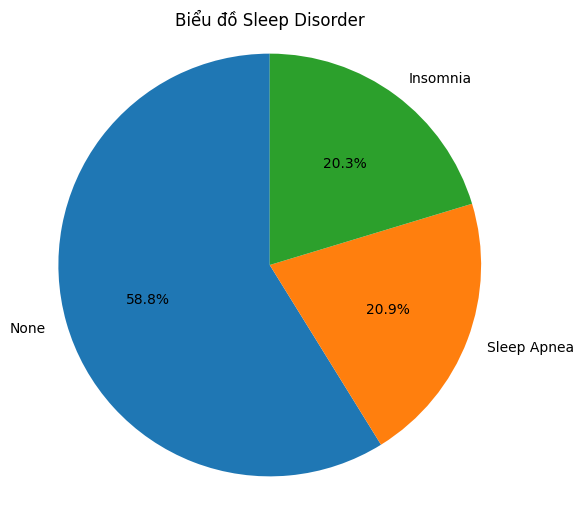

In [65]:
# Tính toán số lượng mẫu cho từng giá trị của thuộc tính "Sleep Disorder"
Sleep_Disorder_counts = data['Sleep Disorder'].value_counts()

# Tạo biểu đồ Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(Sleep_Disorder_counts, labels=Sleep_Disorder_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Biểu đồ Sleep Disorder')
plt.axis('equal')  # Đảm bảo biểu đồ tròn

# Hiển thị biểu đồ
plt.show()

## **IV. Xử lý dữ liệu nhiễu**

### **a. Kiểm tra dữ liệu nhiễu**

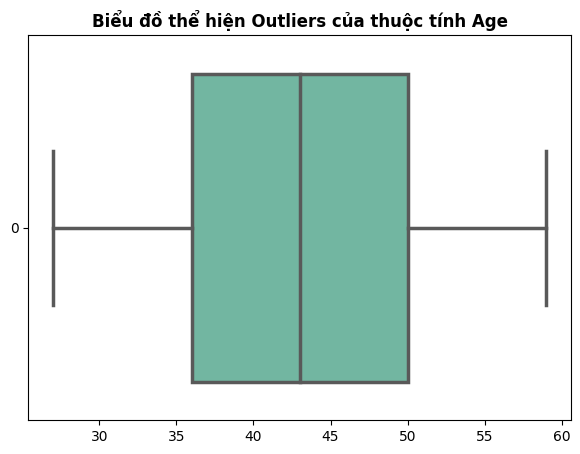

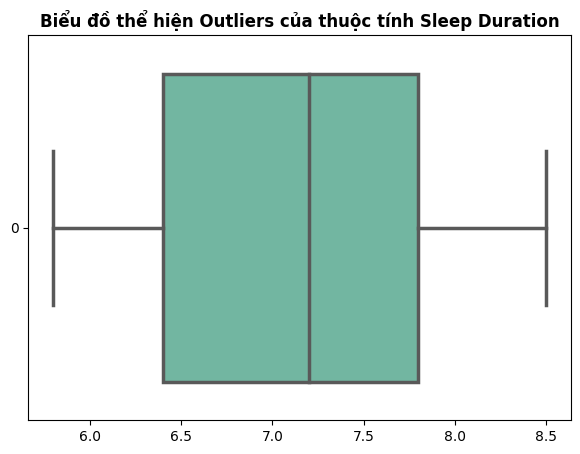

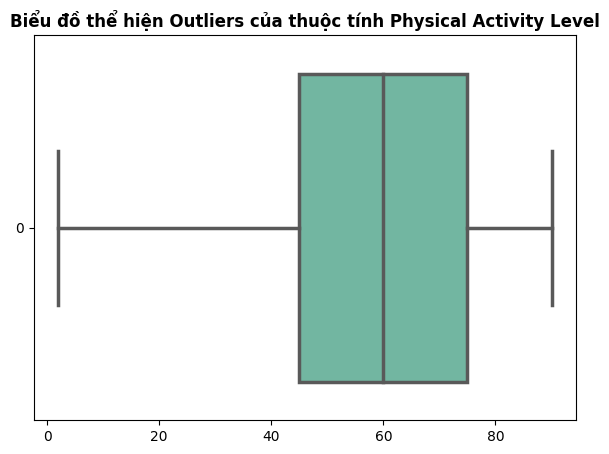

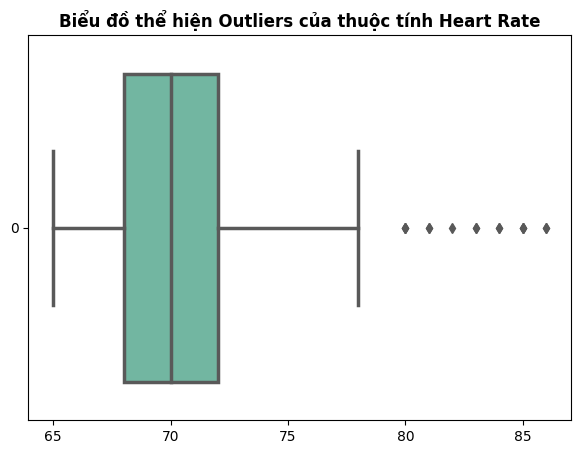

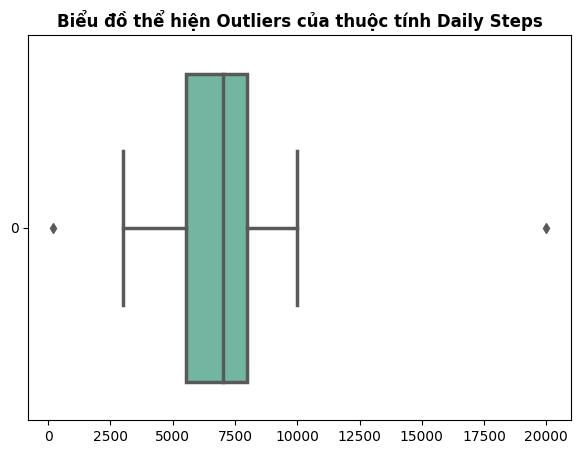

In [66]:
# Chọn các thuộc tính để phát hiện Outliers
selected_columns = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Heart Rate', 'Daily Steps']

for column in selected_columns:
  # Vẽ biểu đồ boxplot cho các thuộc tính được chọn
  plt.figure(figsize=(7, 5))
  sns.boxplot(data=data[column], orient="h", palette="Set2", linewidth=2.5)
  plt.title(f"Biểu đồ thể hiện Outliers của thuộc tính {column}", fontweight='bold')
  # Hiển thị biểu đồ
  plt.show()

### **b. Hiển thị dữ liệu nhiễu**

In [67]:
# Hàm để in ra các giá trị outliers của một thuộc tính cụ thể
def print_outliers(column_name, data1):
    column = data1[column_name]
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = column[(column < lower_bound) | (column > upper_bound)]

    if not outliers.empty:
        print(f"Outliers for '{column_name}':")
        print(outliers)

print_outliers('Heart Rate', data)
print_outliers('Daily Steps', data)

Outliers for 'Heart Rate':
3      85
4      85
5      85
6      82
16     80
18     80
80     81
81     81
93     84
145    84
147    80
264    83
266    83
276    86
277    86
Name: Heart Rate, dtype: int64
Outliers for 'Daily Steps':
10       200
265    20000
Name: Daily Steps, dtype: int64


### **c. Xử lý Outliers**

In [68]:
# IQR
# Calculate the upper and lower limits
Q1 = data["Daily Steps"].quantile(0.25)
Q3 = data["Daily Steps"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(data["Daily Steps"]>=upper)[0]
lower_array = np.where(data["Daily Steps"]<=lower)[0]

data["Daily Steps"][lower_array] = data["Daily Steps"].median()
data["Daily Steps"][upper_array] = data["Daily Steps"].median()

<ipython-input-68-9f94504b6ce5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Daily Steps"][lower_array] = data["Daily Steps"].median()
<ipython-input-68-9f94504b6ce5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Daily Steps"][upper_array] = data["Daily Steps"].median()


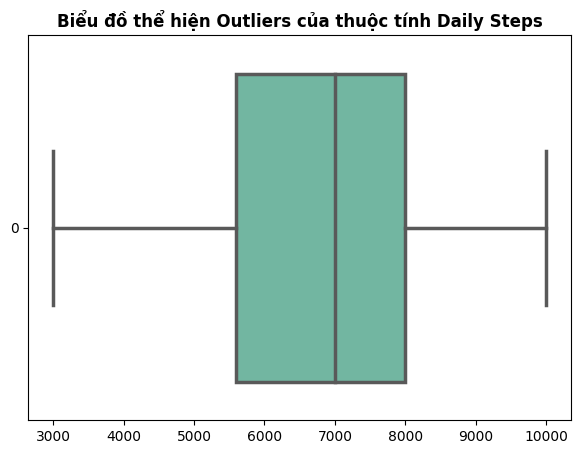

In [69]:
# Chọn các thuộc tính để phát hiện Outliers
selected_columns = ['Daily Steps']

for column in selected_columns:
  # Vẽ biểu đồ boxplot cho các thuộc tính được chọn
  plt.figure(figsize=(7, 5))
  sns.boxplot(data=data[column], orient="h", palette="Set2", linewidth=2.5)
  plt.title(f"Biểu đồ thể hiện Outliers của thuộc tính {column}", fontweight='bold')
  # Hiển thị biểu đồ
  plt.show()

## **V. Phân phối dữ liệu**

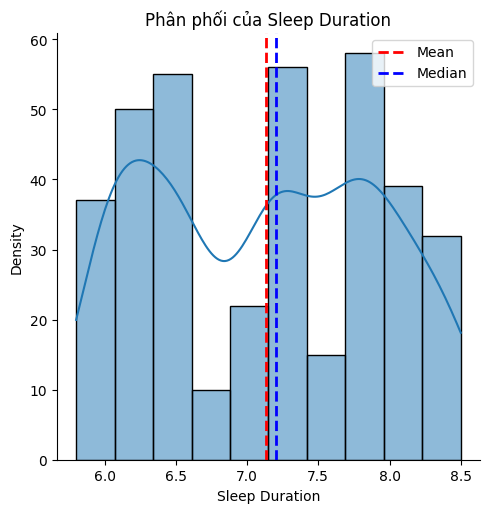

statistic =  0.9362137913703918
pvalue =  1.4187778556162822e-11
Dữ liệu biến Sleep Duration không tuân theo phân phối chuẩn.



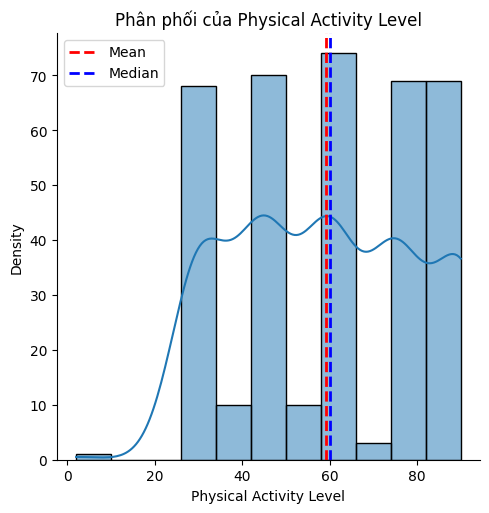

statistic =  0.9086865782737732
pvalue =  3.0538234701421585e-14
Dữ liệu biến Physical Activity Level không tuân theo phân phối chuẩn.



In [70]:
numercial_columns = ['Sleep Duration', 'Physical Activity Level']
for column in numercial_columns:
  sns.displot(data[column], kde=True)

  # Tính giá trị trung bình của dữ liệu
  mean_value = np.mean(data[column])
  median_value = np.median(data[column])

  # Vẽ đường thể hiện giá trị trung bình
  plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=2, label='Mean')
  plt.axvline(median_value, color='b', linestyle='dashed', linewidth=2, label='Median')

  plt.title(f"Phân phối của {column}")
  plt.xlabel(column)
  plt.ylabel("Density")
  plt.legend()
  plt.show()

    # Kiểm định Shapiro-Wilk
  stat, p = stats.shapiro(data[column])
  print("statistic = ", stat)
  print("pvalue = ", p)
  if p > 0.05:
      print(f"Dữ liệu biến {column} có thể tuân theo phân phối chuẩn.", end="\n\n")
  else:
      print(f"Dữ liệu biến {column} không tuân theo phân phối chuẩn.", end="\n\n")

## **VI. Tổng quan dữ liệu sau xử lý**

In [71]:
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6.0,42.0,6,Overweight,Tăng HA giai đoạn 1,77,4200,None
1,2,Male,28,Doctor,6.2,6.0,60.0,8,Normal Weight,HA Cao,75,10000,None
2,3,Male,28,Doctor,6.2,6.0,60.0,8,Normal Weight,HA Cao,75,10000,None
3,4,Male,28,Sales Representative,5.9,4.0,30.0,8,Obese,Tăng HA giai đoạn 2,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4.0,30.0,8,Obese,Tăng HA giai đoạn 2,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9.0,75.0,3,Overweight,Tăng HA giai đoạn 2,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9.0,75.0,3,Overweight,Tăng HA giai đoạn 2,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9.0,75.0,3,Overweight,Tăng HA giai đoạn 2,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9.0,75.0,3,Overweight,Tăng HA giai đoạn 2,68,7000,Sleep Apnea


In [72]:
## Thông tin chi tiết bộ dữ liệu sau xử lý
print('=== THÔNG TIN BỘ DỮ LIỆU SAU XỬ LÝ===')
print('\n>> Số lượng phần tử trong bộ dữ liệu:', data.size)
print('>> Kích thước bộ dữ liệu (số dòng, số cột):', data.shape)
data.info()

=== THÔNG TIN BỘ DỮ LIỆU SAU XỬ LÝ===

>> Số lượng phần tử trong bộ dữ liệu: 4862
>> Kích thước bộ dữ liệu (số dòng, số cột): (374, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    object 
 6   Physical Activity Level  374 non-null    float64
 7   Stress Level             374 non-null    object 
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12

# **Chương 3: Phân tích và khai thác dữ liệu**

## **I. Kiểm định sự tương quan giữa các thuộc tính**

### **1. Kiểm định Spearman**

In [73]:
# Thực hiện kiểm định Spearman
correlation, p_value = spearmanr(data['Physical Activity Level'], data['Sleep Duration'])

# Hiển thị kết quả
print(f"Hệ số tương quan Spearman: {correlation}")
print(f"Giá trị p-value: {p_value}")

# Kiểm tra mức ý nghĩa (alpha = 0.05)
if p_value < 0.05:
    print("Có sự tương quan ý nghĩa.")
else:
    print("Không có sự tương quan ý nghĩa.")

Hệ số tương quan Spearman: 0.20492317162415918
Giá trị p-value: 6.546143859767389e-05
Có sự tương quan ý nghĩa.


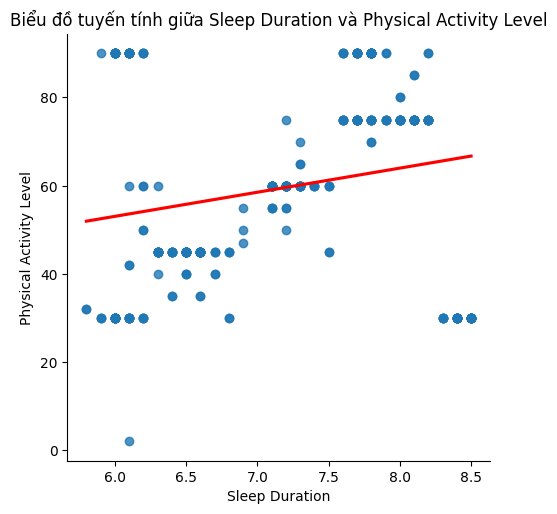

In [74]:
sns.lmplot(x='Sleep Duration', y='Physical Activity Level', data=data, ci=None, line_kws={'color': 'red'})

# Đưa ra kết luận về tính tuyến tính hay phi tuyến tính
plt.title(f"Biểu đồ tuyến tính giữa {'Sleep Duration'} và {'Physical Activity Level'}")
plt.xlabel('Sleep Duration')
plt.ylabel('Physical Activity Level')

plt.show()

### **2. Kiểm định Chi-Square**

In [75]:
select_group = [('Gender', 'Sleep Disorder'),
                ('Occupation', 'Sleep Disorder'),
                ('Quality of Sleep', 'Sleep Disorder'),
                ('Stress Level', 'Sleep Disorder'),
                ('BMI Category', 'Sleep Disorder'),
                ('Blood Pressure', 'Sleep Disorder'),
                ('Gender', 'Quality of Sleep'),
                ('Occupation', 'Quality of Sleep'),
                ('Stress Level', 'Quality of Sleep'),
                ('BMI Category', 'Quality of Sleep'),
                ('Blood Pressure', 'Quality of Sleep')]

for x,y in select_group:
  # Xây dựng bảng tần số cho mỗi mối quan hệ
  contingency_table = pd.crosstab(data[x], data[y])

  # Thực hiện kiểm định Chi-Square cho mỗi mối quan hệ
  chi2, p, _, _ = chi2_contingency(contingency_table)

  # In kết quả
  print(f"Kiểm định Chi-Square cho {x} và {y}")
  print("Chi-Square statistic:", chi2)
  print("P-value:", p)
  print("-" * 100)

Kiểm định Chi-Square cho Gender và Sleep Disorder
Chi-Square statistic: 54.633668609808964
P-value: 1.369145484128385e-12
----------------------------------------------------------------------------------------------------
Kiểm định Chi-Square cho Occupation và Sleep Disorder
Chi-Square statistic: 409.91632045375
P-value: 1.7882450787672573e-74
----------------------------------------------------------------------------------------------------
Kiểm định Chi-Square cho Quality of Sleep và Sleep Disorder
Chi-Square statistic: 157.14424433114073
P-value: 1.258379882414367e-28
----------------------------------------------------------------------------------------------------
Kiểm định Chi-Square cho Stress Level và Sleep Disorder
Chi-Square statistic: 233.99822917039154
P-value: 1.24572775043089e-44
----------------------------------------------------------------------------------------------------
Kiểm định Chi-Square cho BMI Category và Sleep Disorder
Chi-Square statistic: 242.329044445

### **3. Kruskal-Wallis**

In [76]:
select_group = ['Gender','Occupation','Quality of Sleep','Stress Level','BMI Category','Blood Pressure','Sleep Disorder']

for x in select_group:
  gb = data.groupby(x)['Sleep Duration']
  datagb = [group for name, group in gb]

  stat, p = stats.kruskal(*datagb)
  print(f"Kiểm định Kruskal-Wallis cho {x} và Sleep Duration")
  print("Kruskal-Wallis Statistic:", stat)
  print("P-Value:", p)
  print("-" * 100)

Kiểm định Kruskal-Wallis cho Gender và Sleep Duration
Kruskal-Wallis Statistic: 6.101967346717687
P-Value: 0.01350314709301372
----------------------------------------------------------------------------------------------------
Kiểm định Kruskal-Wallis cho Occupation và Sleep Duration
Kruskal-Wallis Statistic: 128.3518650355433
P-Value: 1.0127684146957476e-22
----------------------------------------------------------------------------------------------------
Kiểm định Kruskal-Wallis cho Quality of Sleep và Sleep Duration
Kruskal-Wallis Statistic: 313.8778873545862
P-Value: 1.0384531887303731e-65
----------------------------------------------------------------------------------------------------
Kiểm định Kruskal-Wallis cho Stress Level và Sleep Duration
Kruskal-Wallis Statistic: 321.9171400249063
P-Value: 1.9366766895999508e-67
----------------------------------------------------------------------------------------------------
Kiểm định Kruskal-Wallis cho BMI Category và Sleep Duration

## **II. Phân tích và trực quan hóa**

### **1. Phân tích dựa trên biến Quality of Sleep**

Age - Quality of Sleep

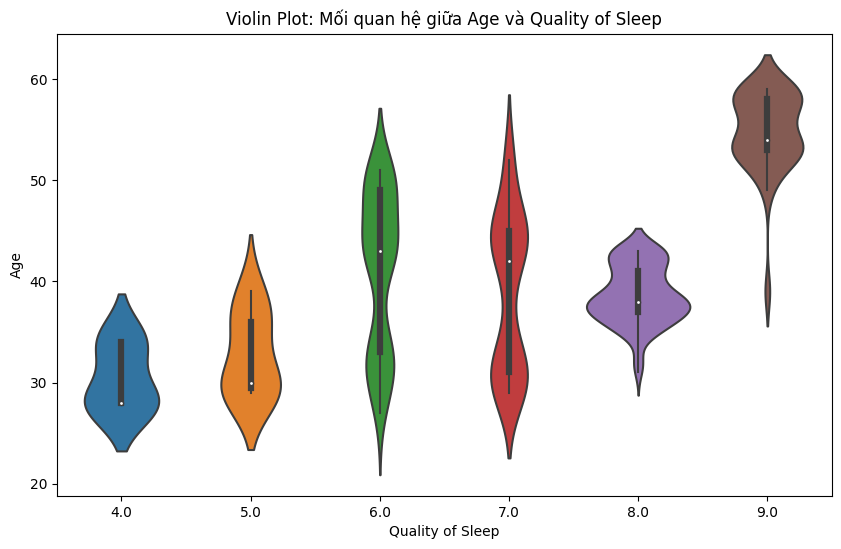

In [77]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Quality of Sleep', y='Age', data=data)
plt.xlabel('Quality of Sleep')
plt.ylabel('Age')
plt.title('Violin Plot: Mối quan hệ giữa Age và Quality of Sleep')
plt.show()

Occupation - Quality of Sleep

In [78]:
# Tạo dữ liệu mẫu
select_column = ['Occupation', 'Quality of Sleep']
df = data[select_column]

# Tạo pivot table
pivot_table = pd.pivot_table(df, index='Occupation', columns='Quality of Sleep', aggfunc=len, fill_value=0, margins=True)
print(pivot_table)

Quality of Sleep      4.0  5.0  6.0  7.0  8.0  9.0  All
Occupation                                             
Accountant              0    0    0    6   29    2   37
Doctor                  0    0   33   34    0    4   71
Engineer                0    1    1    1   27   32   62
Lawyer                  0    0    0    5   42    0   47
Manager                 0    0    0    1    0    0    1
Nurse                   0    4   33    1    3   33   74
Sales Representative    2    0    0    0    0    0    2
Salesperson             0    0   31    1    0    0   32
Scientist               2    0    2    0    0    0    4
Software Engineer       1    0    1    0    2    0    4
Teacher                 0    2    3   29    6    0   40
All                     5    7  104   78  109   71  374


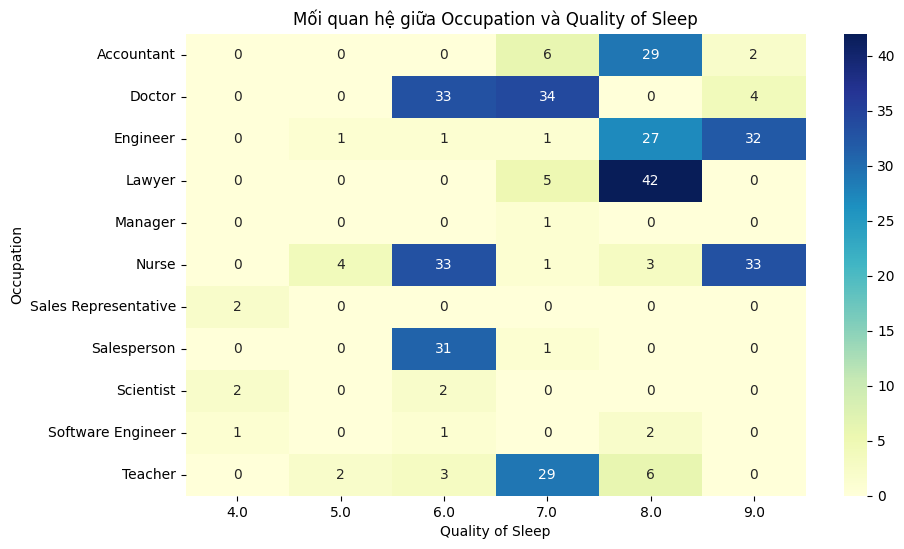

In [79]:
# Vẽ biểu đồ trực quan
# Tạo pivot table để đếm số lượng kết hợp giữa Occupation và Quality of Sleep
pivot_table = df.pivot_table(index='Occupation', columns='Quality of Sleep', aggfunc=len, fill_value=0)

# Tạo heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Mối quan hệ giữa Occupation và Quality of Sleep')
plt.show()

Sleep Duration - Quality of Sleep

In [80]:
# Tạo dữ liệu mẫu
select_column = ['Sleep Duration', 'Quality of Sleep']
df = data[select_column]

# Tạo pivot table
pivot_table = pd.pivot_table(df, index='Sleep Duration', columns='Quality of Sleep', aggfunc=len, fill_value=0)
print(pivot_table)

Quality of Sleep  4.0  5.0  6.0  7.0  8.0  9.0
Sleep Duration                                
5.8                 2    0    0    0    0    0
5.9                 3    0    1    0    0    0
6.0                 0    0   31    0    0    0
6.1                 0    0   25    0    0    0
6.2                 0    0   12    0    0    0
6.3                 0    0   13    0    0    0
6.4                 0    2    6    1    0    0
6.5                 0    3   13   10    0    0
6.6                 0    2    0   18    0    0
6.7                 0    0    0    5    0    0
6.8                 0    0    2    3    0    0
6.9                 0    0    1    2    0    0
7.1                 0    0    0    3   16    0
7.2                 0    0    0    1   37    0
7.3                 0    0    0    2   12    0
7.4                 0    0    0    2    2    0
7.5                 0    0    0    0    5    0
7.6                 0    0    0    5    5    0
7.7                 0    0    0   14   10    0
7.8          

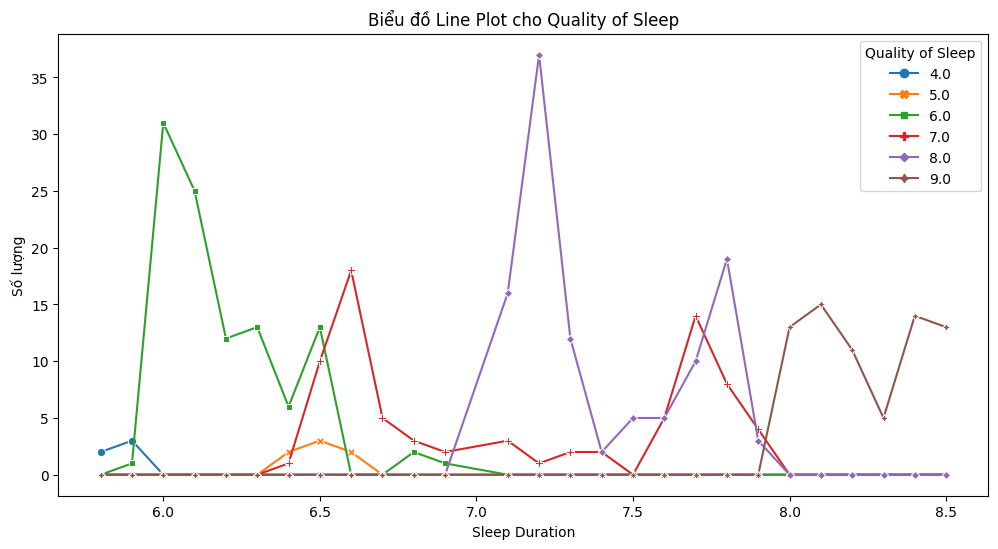

In [81]:
# Vẽ biểu đồ Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_table, dashes=False, markers=True)

plt.xlabel('Sleep Duration')
plt.ylabel('Số lượng')
plt.title('Biểu đồ Line Plot cho Quality of Sleep')

# Hiển thị biểu đồ
plt.show()

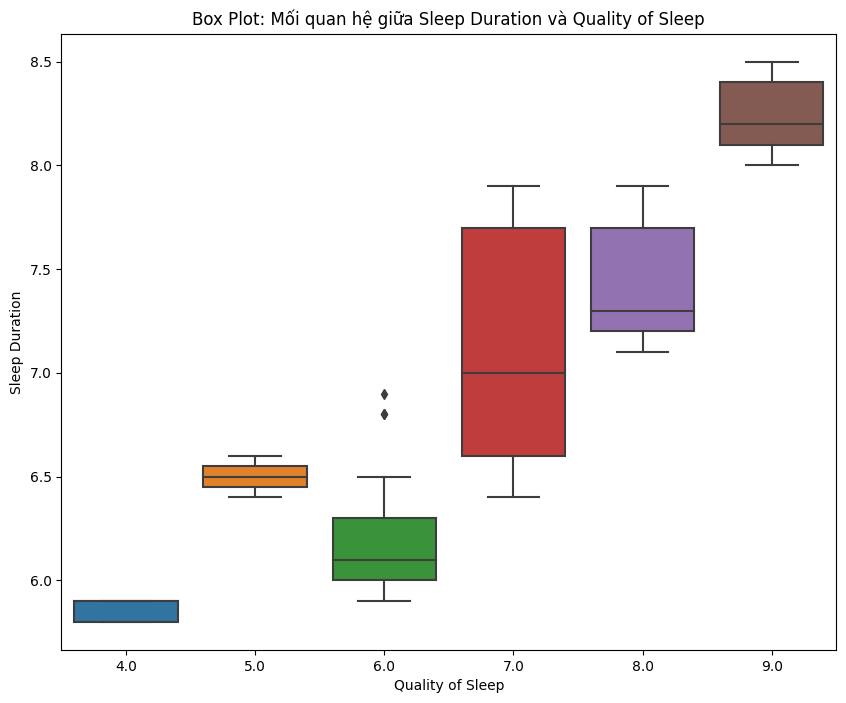

In [82]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Quality of Sleep', y='Sleep Duration', data=data)
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration')
plt.title('Box Plot: Mối quan hệ giữa Sleep Duration và Quality of Sleep')
plt.show()

Physical Activity Level - Quality of Sleep

In [83]:
# Tạo dữ liệu mẫu
select_column = ['Physical Activity Level', 'Quality of Sleep']
df = data[select_column]

# Tạo pivot table
pivot_table = pd.pivot_table(df, index='Physical Activity Level', columns='Quality of Sleep', aggfunc=len, fill_value=0)
print(pivot_table)

Quality of Sleep         4.0  5.0  6.0  7.0  8.0  9.0
Physical Activity Level                              
2.0                        0    0    1    0    0    0
30.0                       3    0   29    2    0   32
32.0                       2    0    0    0    0    0
35.0                       0    4    0    0    0    0
40.0                       0    3    1    2    0    0
42.0                       0    0    2    0    0    0
45.0                       0    0   32   33    2    0
47.0                       0    0    1    0    0    0
50.0                       0    0    2    1    1    0
55.0                       0    0    0    4    2    0
60.0                       0    0    4    2   66    0
65.0                       0    0    0    2    0    0
70.0                       0    0    0    0    3    0
75.0                       0    0    0   32    2   33
80.0                       0    0    0    0    0    2
85.0                       0    0    0    0    0    2
90.0                       0

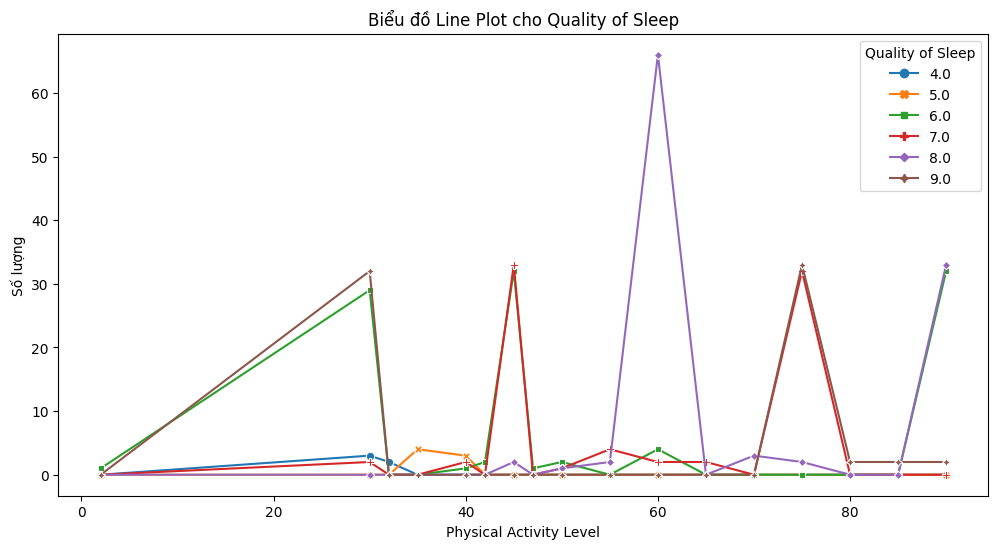

In [84]:
# Vẽ biểu đồ Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_table, dashes=False, markers=True)

plt.xlabel('Physical Activity Level')
plt.ylabel('Số lượng')
plt.title('Biểu đồ Line Plot cho Quality of Sleep')

# Hiển thị biểu đồ
plt.show()

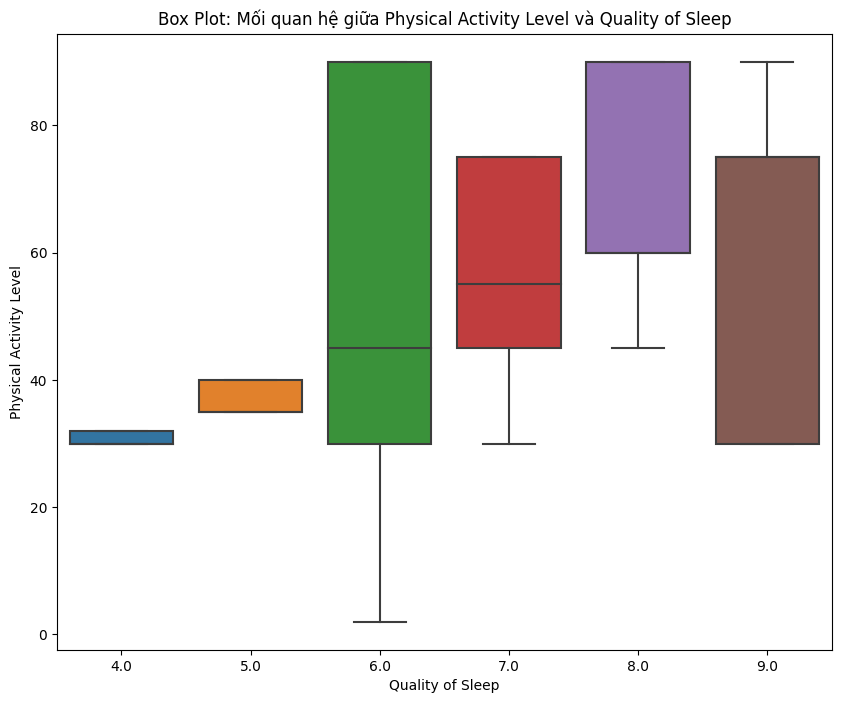

In [85]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Quality of Sleep', y='Physical Activity Level', data=data)
plt.xlabel('Quality of Sleep')
plt.ylabel('Physical Activity Level')
plt.title('Box Plot: Mối quan hệ giữa Physical Activity Level và Quality of Sleep')
plt.show()

Stress Level -  Quality of Sleep

In [86]:
# Tạo dữ liệu mẫu
select_column = ['Stress Level', 'Quality of Sleep']
df = data[select_column]

# Tạo pivot table
pivot_table = pd.pivot_table(df, index='Stress Level', columns='Quality of Sleep', aggfunc=len, fill_value=0, margins=True)
print(pivot_table)

Quality of Sleep  4.0  5.0  6.0  7.0  8.0  9.0  All
Stress Level                                       
3                   0    0    0    0    2   69   71
4                   0    0    0   25   43    2   70
5                   0    0    0    7   60    0   67
6                   0    0    4   38    4    0   46
7                   0    7   35    8    0    0   50
8                   5    0   65    0    0    0   70
All                 5    7  104   78  109   71  374


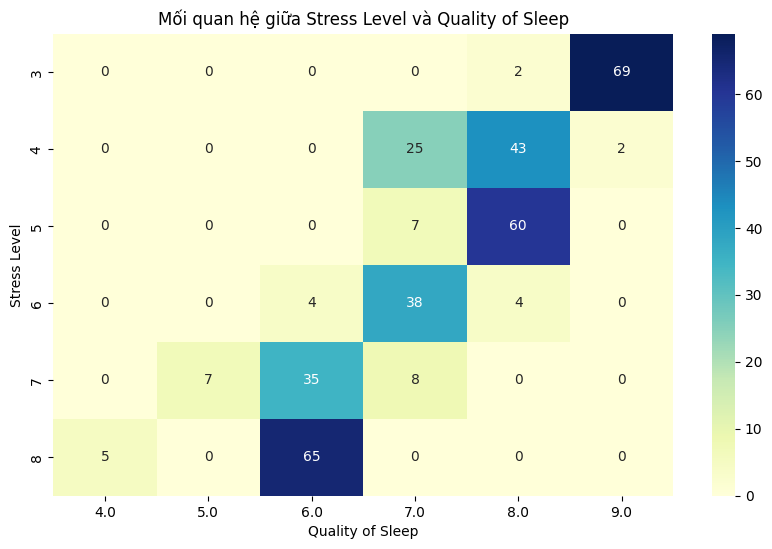

In [87]:
# Vẽ biểu đồ trực quan
# Tính toán số lượng mẫu cho mỗi kết hợp Stress Level và Quality of Sleep
cross_tab = pd.crosstab(df['Stress Level'], df['Quality of Sleep'])

# Vẽ biểu đồ cột với số lượng trên cột
# Tạo pivot table để đếm số lượng kết hợp giữa Stress Level và Quality of Sleep
pivot_table = df.pivot_table(index='Stress Level', columns='Quality of Sleep', aggfunc=len, fill_value=0)

# Tạo heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Mối quan hệ giữa Stress Level và Quality of Sleep')
plt.show()

Sleep Disorder - Quality of Sleep

In [88]:
# Tạo dữ liệu mẫu
select_column = ['Quality of Sleep', 'Sleep Disorder']
df = data[select_column]

# Tạo pivot table
pivot_table = pd.pivot_table(df, index='Quality of Sleep', columns='Sleep Disorder', aggfunc=len, fill_value=0, margins=True)
print(pivot_table)

Sleep Disorder    Insomnia  None  Sleep Apnea  All
Quality of Sleep                                  
4.0                      1     0            4    5
5.0                      4     0            3    7
6.0                     30    41           33  104
7.0                     35    40            3   78
8.0                      5   101            3  109
9.0                      1    38           32   71
All                     76   220           78  374


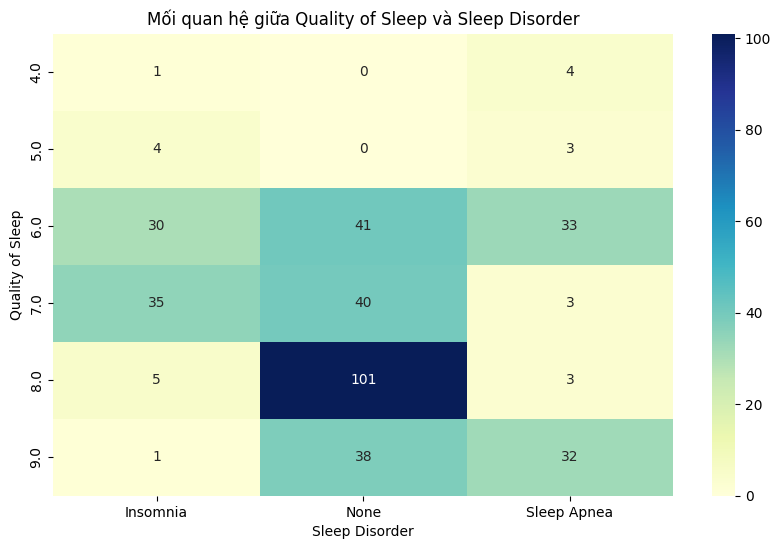

In [89]:
# Vẽ biểu đồ trực quan
# Tính toán số lượng mẫu cho mỗi kết hợp Quality of Sleep và Sleep Disorder
cross_tab = pd.crosstab(df['Quality of Sleep'], df['Sleep Disorder'])

# Vẽ biểu đồ cột với số lượng trên cột
# Tạo pivot table để đếm số lượng kết hợp giữa Quality of Sleep và Sleep Disorder
pivot_table = df.pivot_table(index='Quality of Sleep', columns='Sleep Disorder', aggfunc=len, fill_value=0)

# Tạo heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Mối quan hệ giữa Quality of Sleep và Sleep Disorder')
plt.show()

### **2. Phân tích dựa trên biến Sleep Disorder**

Gender - Sleep Disorder

In [90]:
# Tạo dữ liệu mẫu
select_column = ['Gender', 'Sleep Disorder']
df = data[select_column]

# Tạo pivot table
pivot_table = pd.pivot_table(df, index='Gender', columns='Sleep Disorder', aggfunc=len, fill_value=0, margins=True)
print(pivot_table)

Sleep Disorder  Insomnia  None  Sleep Apnea  All
Gender                                          
Female                36    82           67  185
Male                  40   138           11  189
All                   76   220           78  374


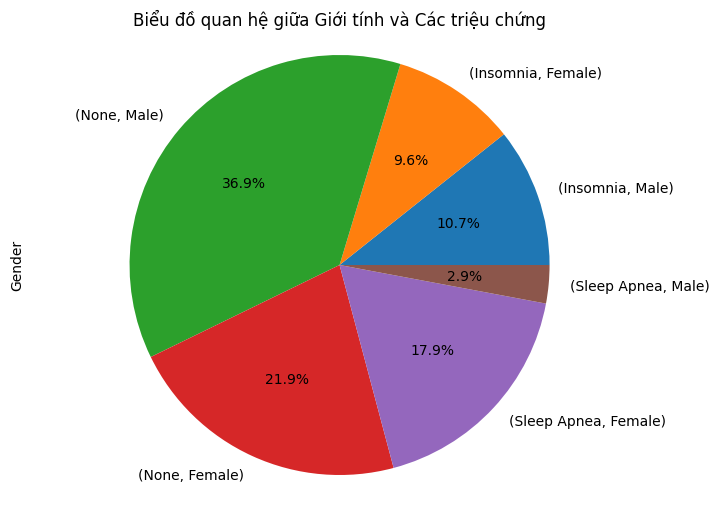

In [91]:
plt.figure(figsize=(8, 6))
data.groupby('Sleep Disorder')['Gender'].value_counts().plot.pie(autopct ='%1.1f%%')
plt.title('Biểu đồ quan hệ giữa Giới tính và Các triệu chứng')
plt.axis('equal')
plt.show()

Occupation - Sleep Disorder

In [92]:
# Tạo dữ liệu mẫu
select_column = ['Occupation', 'Sleep Disorder']
df = data[select_column]

# Tạo pivot table
pivot_table = pd.pivot_table(df, index='Occupation', columns='Sleep Disorder', aggfunc=len, fill_value=0, margins=True)
print(pivot_table)

Sleep Disorder        Insomnia  None  Sleep Apnea  All
Occupation                                            
Accountant                   7    30            0   37
Doctor                       3    64            4   71
Engineer                     5    56            1   62
Lawyer                       2    42            3   47
Manager                      0     1            0    1
Nurse                        3    10           61   74
Sales Representative         0     0            2    2
Salesperson                 28     3            1   32
Scientist                    0     2            2    4
Software Engineer            1     3            0    4
Teacher                     27     9            4   40
All                         76   220           78  374


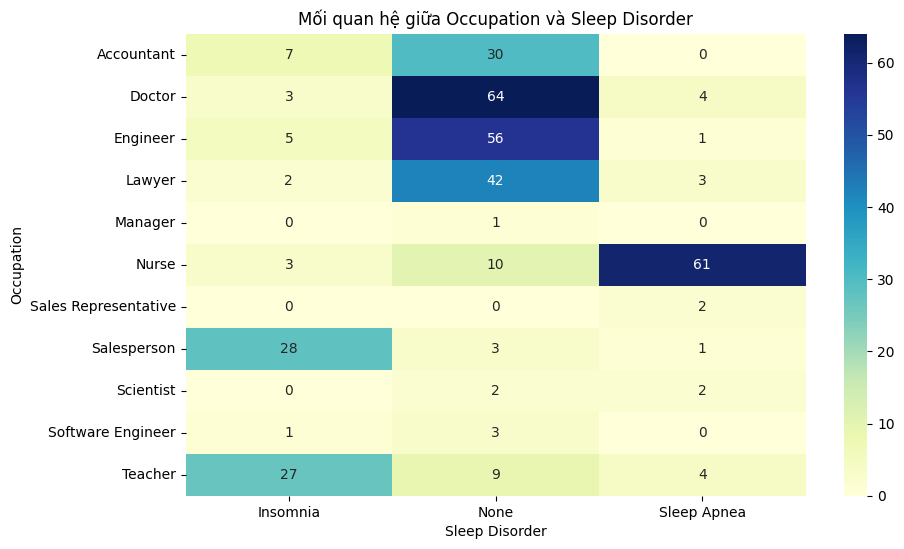

In [93]:
# Vẽ biểu đồ trực quan
# Tạo pivot table để đếm số lượng kết hợp giữa Occupation và Sleep Disorder
pivot_table = df.pivot_table(index='Occupation', columns='Sleep Disorder', aggfunc=len, fill_value=0)

# Tạo heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Mối quan hệ giữa Occupation và Sleep Disorder')
plt.show()

BMI Category - Sleep Disorder

In [94]:
# Tạo dữ liệu mẫu
select_column = ['BMI Category', 'Sleep Disorder']
df = data[select_column]

# Tạo pivot table
pivot_table = pd.pivot_table(df, index='BMI Category', columns='Sleep Disorder', aggfunc=len, fill_value=0, margins=True)
print(pivot_table)

Sleep Disorder  Insomnia  None  Sleep Apnea  All
BMI Category                                    
Normal Weight          9   200            7  216
Obese                  4     0            6   10
Overweight            63    20           65  148
All                   76   220           78  374


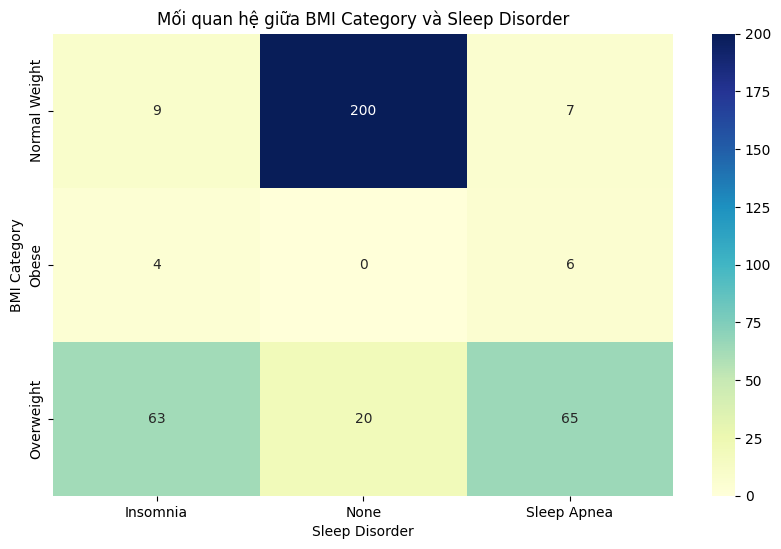

In [95]:
# Vẽ biểu đồ trực quan
# Tính toán số lượng mẫu cho mỗi kết hợp BMI Category và Sleep Disorder
cross_tab = pd.crosstab(df['BMI Category'], df['Sleep Disorder'])

# Vẽ biểu đồ cột với số lượng trên cột
# Tạo pivot table để đếm số lượng kết hợp giữa BMI Category và Sleep Disorder
pivot_table = df.pivot_table(index='BMI Category', columns='Sleep Disorder', aggfunc=len, fill_value=0)

# Tạo heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Mối quan hệ giữa BMI Category và Sleep Disorder')
plt.show()

Blood Pressure - Sleep Disorder

In [96]:
# Tạo dữ liệu mẫu
select_column = ['Blood Pressure', 'Sleep Disorder']
df = data[select_column]

# Tạo pivot table
pivot_table = pd.pivot_table(df, index='Blood Pressure', columns='Sleep Disorder', aggfunc=len, fill_value=0, margins=True)
print(pivot_table)

Sleep Disorder       Insomnia  None  Sleep Apnea  All
Blood Pressure                                       
HA Bình thường              1    82            3   86
HA Cao                      2    64            0   66
Tăng HA giai đoạn 1        43    67           12  122
Tăng HA giai đoạn 2        30     7           63  100
All                        76   220           78  374


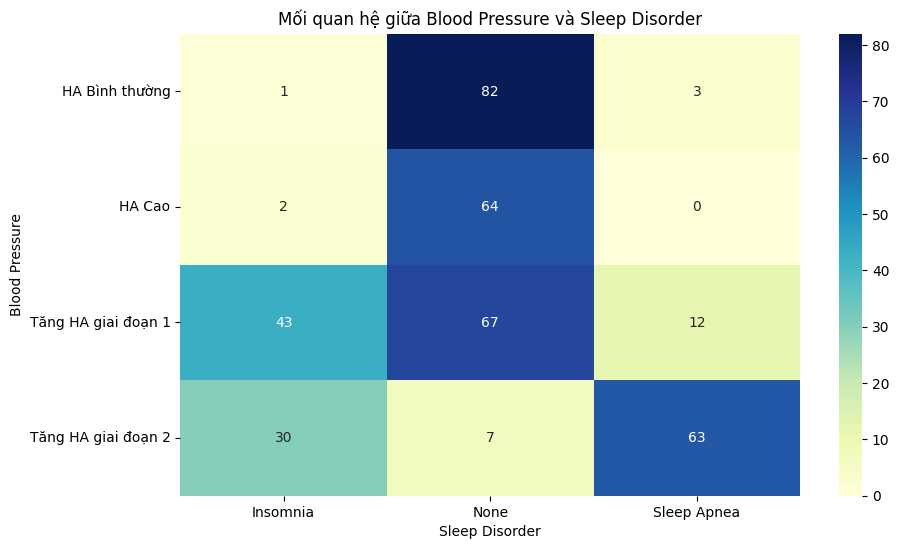

In [97]:
# Vẽ biểu đồ trực quan
# Tính toán số lượng mẫu cho mỗi kết hợp Blood Pressure và Sleep Disorder
cross_tab = pd.crosstab(df['Blood Pressure'], df['Sleep Disorder'])

# Vẽ biểu đồ cột với số lượng trên cột
# Tạo pivot table để đếm số lượng kết hợp giữa Blood Pressure và Sleep Disorder
pivot_table = df.pivot_table(index='Blood Pressure', columns='Sleep Disorder', aggfunc=len, fill_value=0)

# Tạo heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Mối quan hệ giữa Blood Pressure và Sleep Disorder')
plt.show()

Age - Sleep Disorder

In [98]:
# Tạo dữ liệu mẫu
select_column = ['Age', 'Sleep Disorder']
df = data[select_column]

# Tạo pivot table
pivot_table = pd.pivot_table(df, index='Age', columns='Sleep Disorder', aggfunc=len, fill_value=0, margins=True)
print(pivot_table)

Sleep Disorder  Insomnia  None  Sleep Apnea  All
Age                                             
27                     0     1            0    1
28                     1     2            2    5
29                     2     9            2   13
30                     1    11            1   13
31                     0    17            1   18
32                     0    16            0   16
33                     1    12            0   13
34                     0     0            2    2
35                     0    11            1   12
36                     2     8            2   12
37                     0    20            0   20
38                     0    18            2   20
39                     2    13            0   15
40                     0     4            0    4
41                     1    11            0   12
42                     1     6            2    9
43                    16    17            2   35
44                    28     2            0   30
45                  

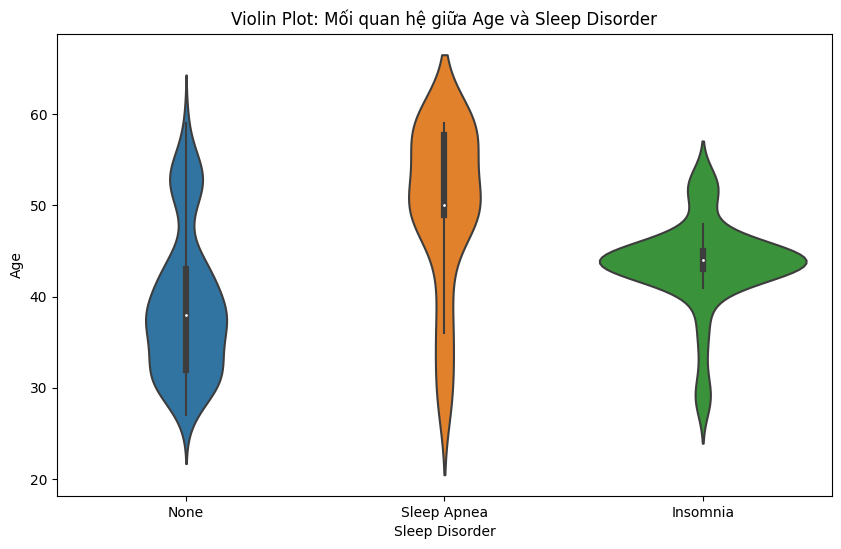

In [99]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sleep Disorder', y='Age', data=data)
plt.xlabel('Sleep Disorder')
plt.ylabel('Age')
plt.title('Violin Plot: Mối quan hệ giữa Age và Sleep Disorder')
plt.show()

### **3. Phân tích dựa trên biến Sleep Duration**

Occupation - Sleep Duration


In [100]:
result = data.groupby(['Occupation'])['Sleep Duration'].mean().reset_index().sort_values(by='Sleep Duration', ascending=False)
# Hiển thị số lượng của từng giá trị Occupation
occupation_counts = data['Occupation'].value_counts()
# Kết hợp kết quả với số lượng Occupation
result = result.merge(occupation_counts, left_on='Occupation', right_index=True)
result = result.drop('Occupation_x', axis=1)
result

,Occupation,Sleep Duration,Occupation_y
2,Engineer,7.998387,62
3,Lawyer,7.406383,47
0,Accountant,7.113514,37
5,Nurse,7.066216,74
1,Doctor,6.961972,71
4,Manager,6.900000,1
9,Software Engineer,6.750000,4
10,Teacher,6.690000,40
7,Salesperson,6.403125,32
8,Scientist,6.000000,4


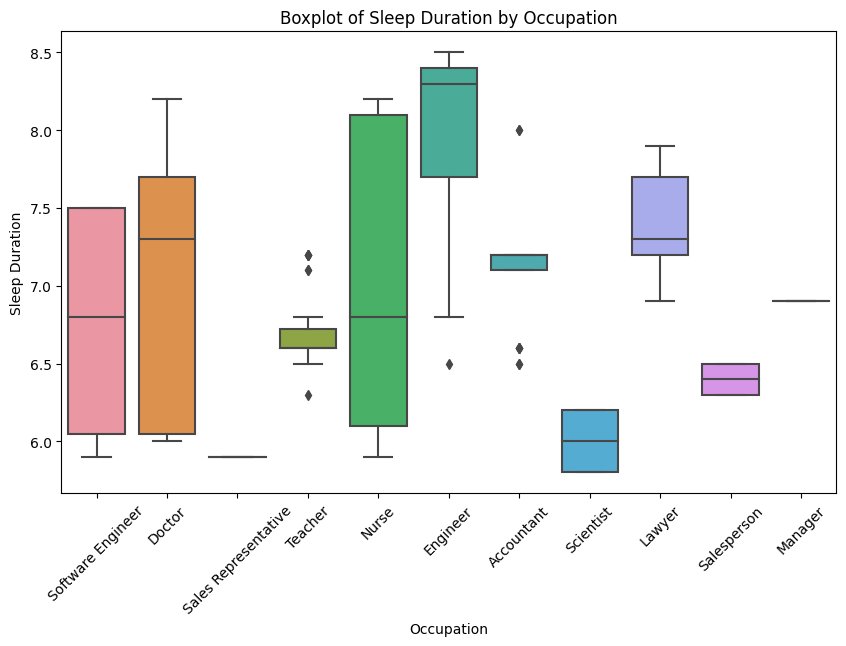

In [101]:
# Vẽ biểu đồ boxplot
plt.figure(figsize=(10, 6))  # Tùy chỉnh kích thước biểu đồ nếu cần
sns.boxplot(data=data, x='Occupation', y='Sleep Duration')

# Tùy chỉnh nhãn và tiêu đề
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration')
plt.title('Boxplot of Sleep Duration by Occupation')

# Hiển thị biểu đồ
plt.xticks(rotation=45)  # Đặt góc quay cho nhãn x nếu cần
plt.show()

Stress Level - Sleep Duration

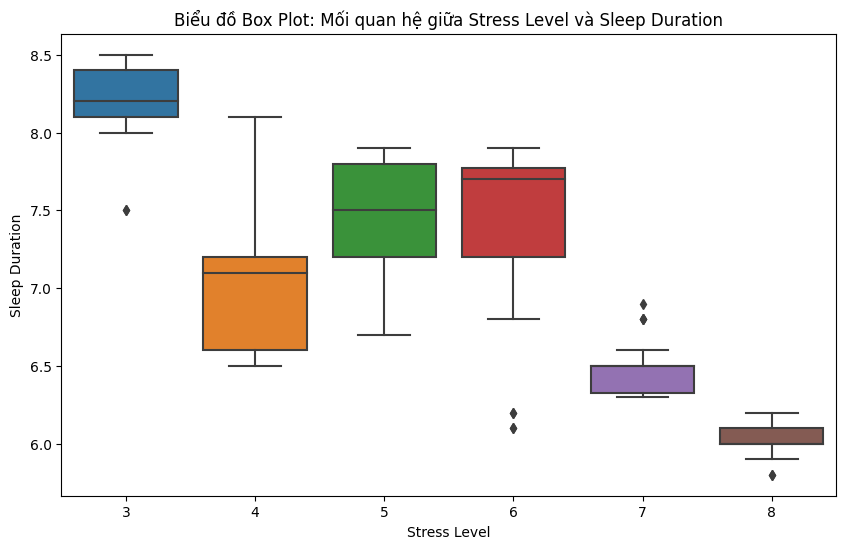

In [102]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stress Level', y='Sleep Duration', data=data)
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration')
plt.title('Biểu đồ Box Plot: Mối quan hệ giữa Stress Level và Sleep Duration')
plt.show()

Age - Sleep Duration

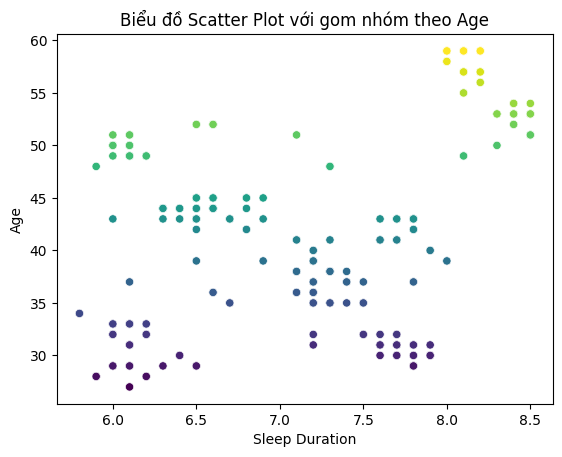

In [103]:
sns.scatterplot(x='Sleep Duration', y='Age', data=data, hue='Age', palette='viridis', legend=False)
plt.xlabel('Sleep Duration')
plt.ylabel('Age')
plt.title('Biểu đồ Scatter Plot với gom nhóm theo Age')
plt.show()

Physical Activity Level - Sleep Duration

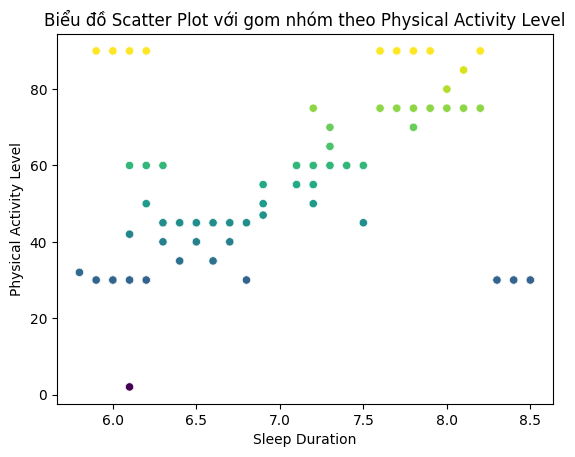

In [104]:
sns.scatterplot(x='Sleep Duration', y='Physical Activity Level', data=data,
                hue='Physical Activity Level', palette='viridis', legend=False)
plt.xlabel('Sleep Duration')
plt.ylabel('Physical Activity Level')
plt.title('Biểu đồ Scatter Plot với gom nhóm theo Physical Activity Level')
plt.show()

### **4. Sự khác biệt ở từng độ tuổi giữa nam và nữ về các triệu chứng**

In [105]:
import plotly.graph_objects as go

selected_columns = ["Gender", "Age", "Sleep Disorder"]
df = data[selected_columns]

# Chia Age thành các khoảng
bins = [26, 35, 42, 49, 150]
labels = ['27-35', '36-42', '43-49', '50+']
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels)
df['Sleep Disorder'] = df['Sleep Disorder'].astype('category')

df = df.sort_values(by='Age')

# Vẽ biểu đồ Parallel Sets
fig = go.Figure(data=go.Parcats(
        dimensions=[
            {'label': 'Gender', 'values': df['Gender']},
            {'label': 'Age', 'values': df['Age']},
            {'label': 'Sleep Disorder', 'values': df['Sleep Disorder']}
        ],
        line={'color': df['Sleep Disorder'].cat.codes, 'colorscale': 'Viridis'},
    ))

# Chỉnh kích thước biểu đồ
fig.update_layout(
    autosize=False,
    width=800,
    height=400,
)
fig.show()

<ipython-input-105-0c8317579069>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels)
<ipython-input-105-0c8317579069>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sleep Disorder'] = df['Sleep Disorder'].astype('category')


### **5. Sự khác biệt ở từng nghề nghiệp giữa các mức độ stress về thời gian ngủ**

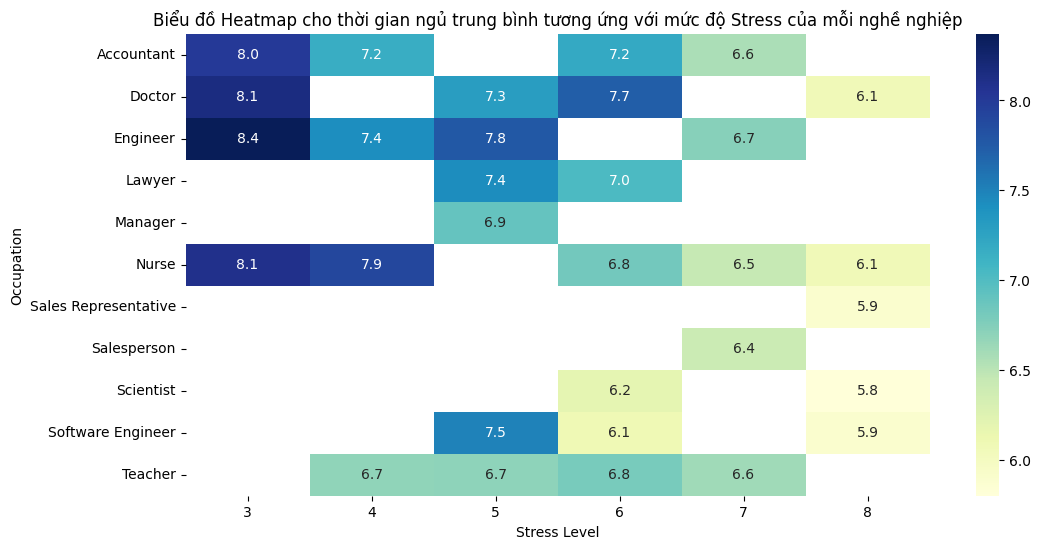

In [106]:
result = data.groupby(['Occupation', 'Stress Level'])['Sleep Duration'].mean().reset_index()
pivot_table = result.pivot(index='Occupation', columns='Stress Level', values='Sleep Duration')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".1f")
plt.xlabel('Stress Level')
plt.ylabel('Occupation')
plt.title('Biểu đồ Heatmap cho thời gian ngủ trung bình tương ứng với mức độ Stress của mỗi nghề nghiệp')
plt.show()